In [1]:
import pybeam.precoded as pbp


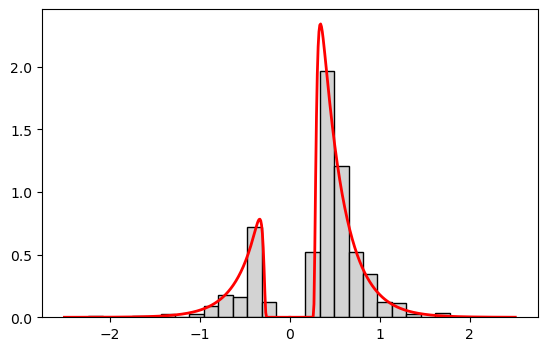

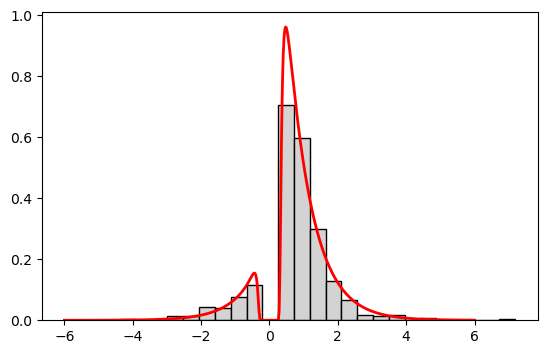

In [14]:
model = pbp.leakage()

phi0 = {'tnd' : 0.25,
          'w' : 0.5,
         'mu' : 1.0,
          'l' : 3.0,
          'b' : 0.5}

rt0 = pbp.simulate(N_sims = 500, model = model, phi = phi0, seed = 123)
fig0 = pbp.plot_rt(model = model, phi = phi0, rt_max = 2.5, rt = rt0);

phi1 = {'tnd' : 0.25,
         'w' : 0.5,
        'mu' : 1.0,
         'l' : 3.0,
         'b' : 0.75}

rt1 = pbp.simulate(N_sims = 500, model = model, phi = phi1, seed = 456)
fig1 = pbp.plot_rt(model = model, phi = phi1, rt_max = 6.0, rt = rt1);


In [15]:
p = {'p_tnd' : 'Uniform("tnd", lower = 0.0, upper = 1.0)',
       'p_w' : 'Uniform("w", lower = 0.25, upper = 0.75)',
      'p_mu' : 'Uniform("mu", lower = -5.0, upper = 5.0)', 
       'p_l' : 'Uniform("l", lower = 0.0, upper = 10.0)',
      'p_b0' : 'Uniform("b0", lower = 0.1, upper = 2.5)',
      'p_b1' : 'Uniform("b1", lower = 0.1, upper = 2.5)'}

c0 = {'rt' : rt0, 
     'tnd' : 'p_tnd',
       'w' : 'p_w',
      'mu' : 'p_mu',
       'l' : 'p_l',
       'b' : 'p_b0'}

c1 = {'rt' : rt1, 
     'tnd' : 'p_tnd',
       'w' : 'p_w',
      'mu' : 'p_mu',
       'l' : 'p_l',
       'b' : 'p_b1'}

c = {0 : c0 , 1 : c1}

idata = pbp.inference(model = model,   
                     priors = p,       
                 conditions = c,       
                    samples = 25000,   
                     chains = 3,       
                      cores = 3,          
                  file_name = 'leakage')


Multiprocess sampling (3 chains in 3 jobs)
DEMetropolisZ: [b1, b0, l, mu, w, tnd]


/Users/matthewmurrow/opt/miniconda3/envs/pymc_env/lib/python3.10/site-packages/pymc/step_methods/metropolis.py:1024: RuntimeWarning: overflow encountered in exp
  "accept": np.exp(accept),
/Users/matthewmurrow/opt/miniconda3/envs/pymc_env/lib/python3.10/site-packages/pymc/step_methods/metropolis.py:1024: RuntimeWarning: overflow encountered in exp
  "accept": np.exp(accept),
/Users/matthewmurrow/opt/miniconda3/envs/pymc_env/lib/python3.10/site-packages/pymc/step_methods/metropolis.py:1024: RuntimeWarning: overflow encountered in exp
  "accept": np.exp(accept),
Sampling 3 chains for 0 tune and 25_000 draw iterations (0 + 75_000 draws total) took 95 seconds.


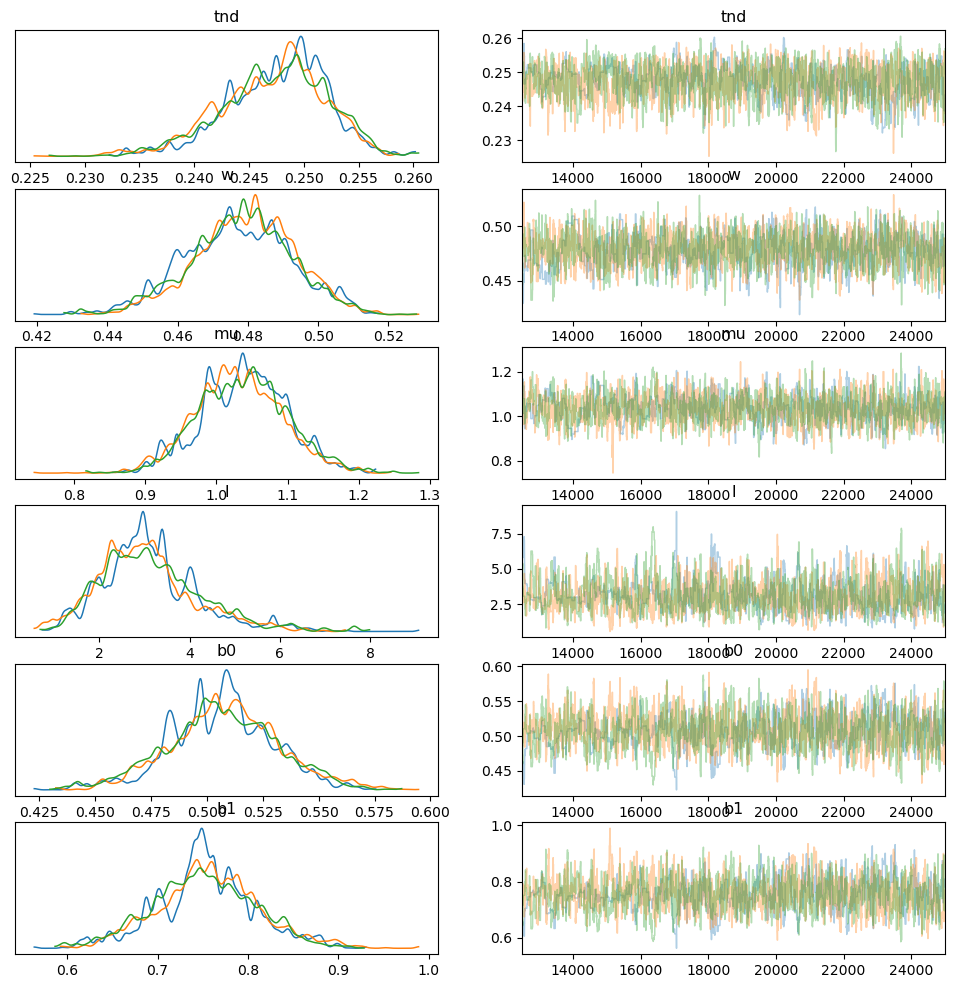

In [16]:
pbp.plot_idata(file_name = 'leakage', burnin = 12500);


In [17]:
pbp.summary(file_name = 'leakage', burnin = 12500)


,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
tnd,0.247,0.005,0.238,0.256,0.000,0.000,558.0,939.0,1.02
w,0.478,0.015,0.451,0.506,0.001,0.000,726.0,497.0,1.00
mu,1.036,0.061,0.922,1.149,0.002,0.002,699.0,1055.0,1.00
l,3.114,1.107,1.168,5.224,0.047,0.034,566.0,943.0,1.01
b0,0.507,0.024,0.462,0.554,0.001,0.001,540.0,763.0,1.02
b1,0.754,0.056,0.645,0.862,0.002,0.002,568.0,903.0,1.01
